># $\text{House Prices Advanced Regression Techniques}\newline$

$\text{In this noteebook, I will use RandomForestRegressor for predict the SalePrice of eah house}$

### $\text{Importation des frameworks utiles}$
>### $\text{Python necessary frameworks importing}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error

## $\text{Chargement des données de test et d'entrainement de notre future model}$
>## $\text{test and train data loading}$

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## $\text{Duplication des données por ne pas abimer les données originales}$

In [3]:
clean_train = train.copy()
clean_test = test.copy()

## $\text{Transformation des données en chaînes de caractères en numériques et \\ forcé les exceptions en Nan}$

In [4]:
cols_train = clean_train.columns
for col_train in cols_train:
    clean_train[col_train] = pd.to_numeric(clean_train[col_train], errors='coerce')

cols_test = clean_test.columns
for col_test in cols_test:
    clean_test[col_test] = pd.to_numeric(clean_test[col_test], errors='coerce')

## $\text{Recolte des colonnes qui ont des données en Nan dans des listes}$

In [5]:
unfull_cols_train = []
unfull_cols_test = []

for col_train in cols_train:
    if clean_train[col_train].isnull().sum() >= 1:
        unfull_cols_train.append(col_train)
        
for col_test in cols_test:
    if clean_train[col_test].isnull().sum() >= 1:
        unfull_cols_test.append(col_test)

## $\text{On efface les colonnes recoltées avant}$

In [6]:
clean_train.drop(unfull_cols_train, axis=1, inplace=True)
clean_test.drop(unfull_cols_test, axis=1, inplace=True)

## $\text{Affichage des informations}$

In [7]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

## $\text{Affichage des informations}$

In [8]:
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   BsmtFinSF1     1458 non-null   float64
 8   BsmtFinSF2     1458 non-null   float64
 9   BsmtUnfSF      1458 non-null   float64
 10  TotalBsmtSF    1458 non-null   float64
 11  1stFlrSF       1459 non-null   int64  
 12  2ndFlrSF       1459 non-null   int64  
 13  LowQualFinSF   1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1457 non-null   float64
 16  BsmtHalfBath   1457 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

## $\text{Visulisation du priix des maisons par rapport à la taille se celle-ci}$

<Axes: xlabel='LotArea', ylabel='SalePrice'>

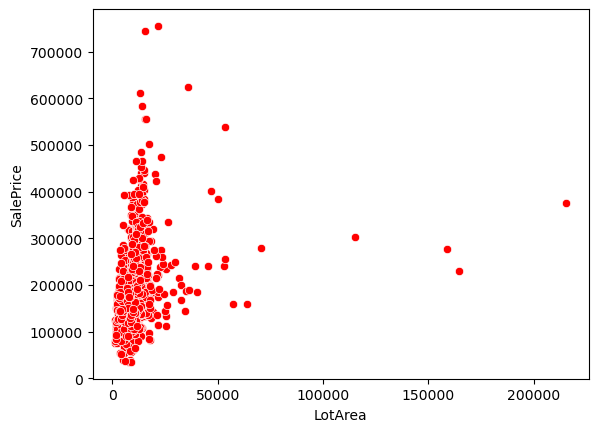

In [9]:
sns.scatterplot(x='LotArea', y='SalePrice', data=clean_train, c='r')

## $\text{Entraînement du model et verification de son score}$

In [39]:
X = clean_train.drop('SalePrice', axis=1)
y = clean_train.SalePrice

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = RandomForestRegressor(n_estimators=230)
model.fit(X, y)
pred_val = model.predict(X)

score_mean = mean_absolute_error(y, pred_val)
score = model.score(X, y)
L.append(score)

print(f"MAE: {score_mean}")
print(f"The model's score of precision is: {score}")

MAE: 6502.764225729601
The model's score of precision is: 0.9822009406314807


## $\text{Utilisaton du model pour predire le prix des maisons sur les données test}$

In [41]:
X = clean_test.copy()

predictions = model.predict(X)

# Sauvegarder uniquement les colonnes 'Id' et 'SalePrice' dans le fichier CSV
output = pd.DataFrame({'Id': clean_test['Id'], 'SalePrice': predictions})
output[['Id', 'SalePrice']].to_csv('submit.csv', index=False)

In [38]:
X.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       1
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64